In [104]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataPath = "english_15/"

vocabulary = pd.read_csv(dataPath + "vocabulary.txt", header=None).to_numpy().flatten()

neutral_topic_mean = np.load(dataPath +"neutral_topic_mean.npy")
negative_topic_mean = np.load(dataPath +"negative_topic_mean.npy")
positive_topic_mean = np.load(dataPath +"positive_topic_mean.npy")
authors = pd.read_csv(dataPath +"authors.csv")
authors["name"]


os.path.join(os.path.dirname('.'), os.pardir)
decoder = pd.read_csv(os.path.join(os.path.join(os.path.dirname('.'), os.pardir), "data\\paradigms\\clean\\english\\id_name_para.csv"), index_col=0)['Judge Name']
print("n_topics:", neutral_topic_mean.shape[0])
print("n_judges:", authors.shape[0])


n_topics: 15
n_judges: 1262


In [105]:
vocabulary

array(['abandon', 'abbreviations', 'abilities', ..., 'zizek', 'zone',
       'zoom'], dtype=object)

In [106]:
# @title Run this cell to create helper function for printing topics


def get_topics(
    neutral_mean, negative_mean, positive_mean, vocabulary, print_to_terminal=True
):
    num_topics, num_words = neutral_mean.shape
    words_per_topic = 10
    top_neutral_words = np.argsort(-neutral_mean, axis=1)
    top_negative_words = np.argsort(-negative_mean, axis=1)
    top_positive_words = np.argsort(-positive_mean, axis=1)
    topic_strings = []
    for topic_idx in range(num_topics):
        neutral_start_string = "Neutral  {}:".format(topic_idx)
        neutral_row = [
            vocabulary[word] for word in top_neutral_words[topic_idx, :words_per_topic]
        ]
        neutral_row_string = ", ".join(neutral_row)
        neutral_string = " ".join([neutral_start_string, neutral_row_string])

        positive_start_string = "Positive {}:".format(topic_idx)
        positive_row = [
            vocabulary[word] for word in top_positive_words[topic_idx, :words_per_topic]
        ]
        positive_row_string = ", ".join(positive_row)
        positive_string = " ".join([positive_start_string, positive_row_string])

        negative_start_string = "Negative {}:".format(topic_idx)
        negative_row = [
            vocabulary[word] for word in top_negative_words[topic_idx, :words_per_topic]
        ]
        negative_row_string = ", ".join(negative_row)
        negative_string = " ".join([negative_start_string, negative_row_string])

        if print_to_terminal:
            topic_strings.append(negative_string)
            topic_strings.append(neutral_string)
            topic_strings.append(positive_string)
            topic_strings.append("==========")
        else:
            topic_strings.append(
                "  \n".join([negative_string, neutral_string, positive_string])
            )

    if print_to_terminal:
        all_topics = "{}\n".format(np.array(topic_strings))
    else:
        all_topics = np.array(topic_strings)
    return all_topics

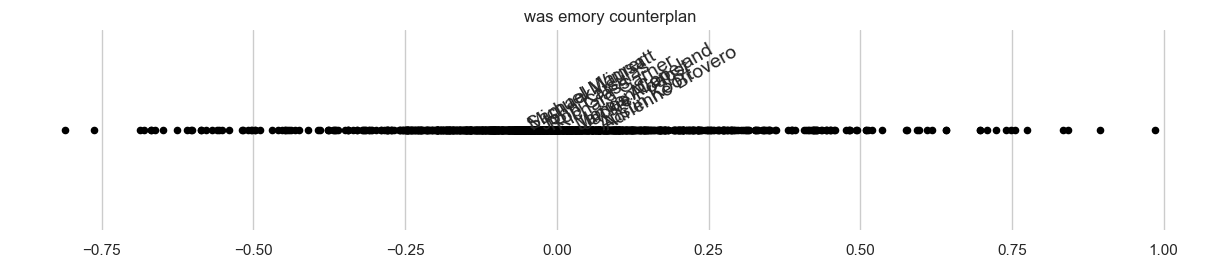

In [107]:
selected_authors = np.array(
    [
        "Rob Glass",
        "James Allan",
        "Michael Wimsatt",
        "Richard Garner",
        "Austin Koort",
        "Adrienne Brovero",
        "Morgan Copeland",
        "John Katsulas",
        "Samuel Maurer",
        "Jackie Poapst"
    ]
)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 2))
ax = plt.axes([0, 0, 1, 1], frameon=False)
ax.set_title('was emory counterplan')
for index in range(authors.shape[0]):
    ax.scatter(authors["ideal_point_14"][index], 0, c="black", s=20)
    if decoder[authors["name"][index]] in selected_authors:
        ax.annotate(
            decoder[authors["name"][index]],
            xy=(authors["ideal_point_14"][index], 0.0),
            xytext=(authors["ideal_point_14"][index], 0),
            rotation=30,
            size=14,
        )
ax.set_yticks([])
plt.show()



In [115]:
authors_c = authors.drop('Unnamed: 0', axis=1)
authors_c.sort_values('ideal_point_14', inplace=True)
authors_c.rename({'name':'Judge ID'}, axis=1, inplace=True)
authors_c.set_index('Judge ID', inplace=True)
authors_c = authors_c.merge(decoder, on='Judge ID')
authors_c.head()

ideal_point_0  ideal_point_1  ideal_point_2  ideal_point_3  \
Judge ID                                                               
7152           0.494483      -0.036737       0.289985      -0.061361   
6933           0.201627       0.007845       0.871428       0.260094   
64024         -0.002333      -0.014782      -0.832722      -0.422606   
12402         -0.084913      -0.003072       0.321124       0.019098   
6599           0.008716       0.013156       0.084101       0.191863   

          ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
Judge ID                                                               
7152           0.972813       0.005232       0.764603      -0.025222   
6933          -0.061422      -0.186419       0.199857       0.105825   
64024          0.048617      -0.025792      -0.016333       0.045977   
12402         -0.039949      -0.007314       0.371313       0.063171   
6599           0.403007       0.239540       0.048132      -0.021986   

          ideal_point_8  ideal_point_9  ideal_point_10  ideal_point_11  \
Judge ID                                                                 
7152           0.003472       0.568508        0.010792        0.013161   
6933          -0.075097       0.114890        0.110550       -0.029239   
64024         -0.050081       0.023468        0.152737        0.040526   
12402         -0.023804       0.097372        0.074308       -0.018234   
6599          -0.037573       0.089554        0.076157        0.048317   

          ideal_point_12  ideal_point_13  ideal_point_14            Judge Name  
Judge ID                                                                        
7152            0.028608        0.207295       -0.811391   Austin Wullschleger  
6933           -0.011415        0.302654       -0.762773    Christopher Thomas  
64024          -0.259142       -0.115275       -0.686717    Fletcher Wingfield  
12402          -0.195628       -0.104181       -0.681234  Naima Drecker-Waxman  
6599            0.485949       -0.011107       -0.669573          Sarah Weiner

-1.123948584 1.2622893266666668


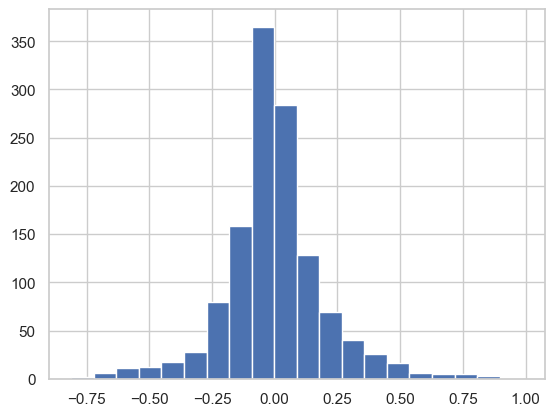

In [116]:
authors_c['ideal_point_14'].hist(bins=20)
print(authors_c.min()[:-1].mean(), authors_c.max()[:-1].mean())



In [110]:

topics = get_topics(neutral_topic_mean, positive_topic_mean, negative_topic_mean, vocabulary)
topics

"['Negative 0: condo, vote, arg, args, good, reject, cp, judge kick, probably, default'\n 'Neutral  0: aff, neg, cp, good, args, affs, arg, alt, perm, da'\n 'Positive 0: aff, perm, impacts, neg, links, alt, don, perms, solve, affs'\n '=========='\n 'Negative 1: priori, rebuttal speeches, term, effects, advocacy, arguing, listed, typical, better debate, sacrifice'\n 'Neutral  1: don, just, voted, priori, save, face, file, feel free, cards, florida'\n 'Positive 1: face, don, just, save, file, florida, focus, voted, edu, alternative'\n '=========='\n 'Negative 2: speed, round, rules, parli, position, nfa ld, npda, opponent, resolution, case'\n 'Neutral  2: round, years, speed, judge, vote, flow, policy, debater, university, debaters'\n 'Positive 2: years, debated, university, high school, college, coached, argument, best, hs, try'\n '=========='\n 'Negative 3: pf, ld, opponent, time, disclosure, tournament, wiki, policy, speech, public forum'\n 'Neutral  3: evidence, round, speech, flow, 

In [111]:
K = neutral_topic_mean.shape[0]
neutral_topic_mean.shape

(15, 10492)

In [112]:
from wordcloud import WordCloud #type: ignore

In [113]:
authors_c.drop("Judge Name", axis=1).abs().mean().max()

0.22776042318819636

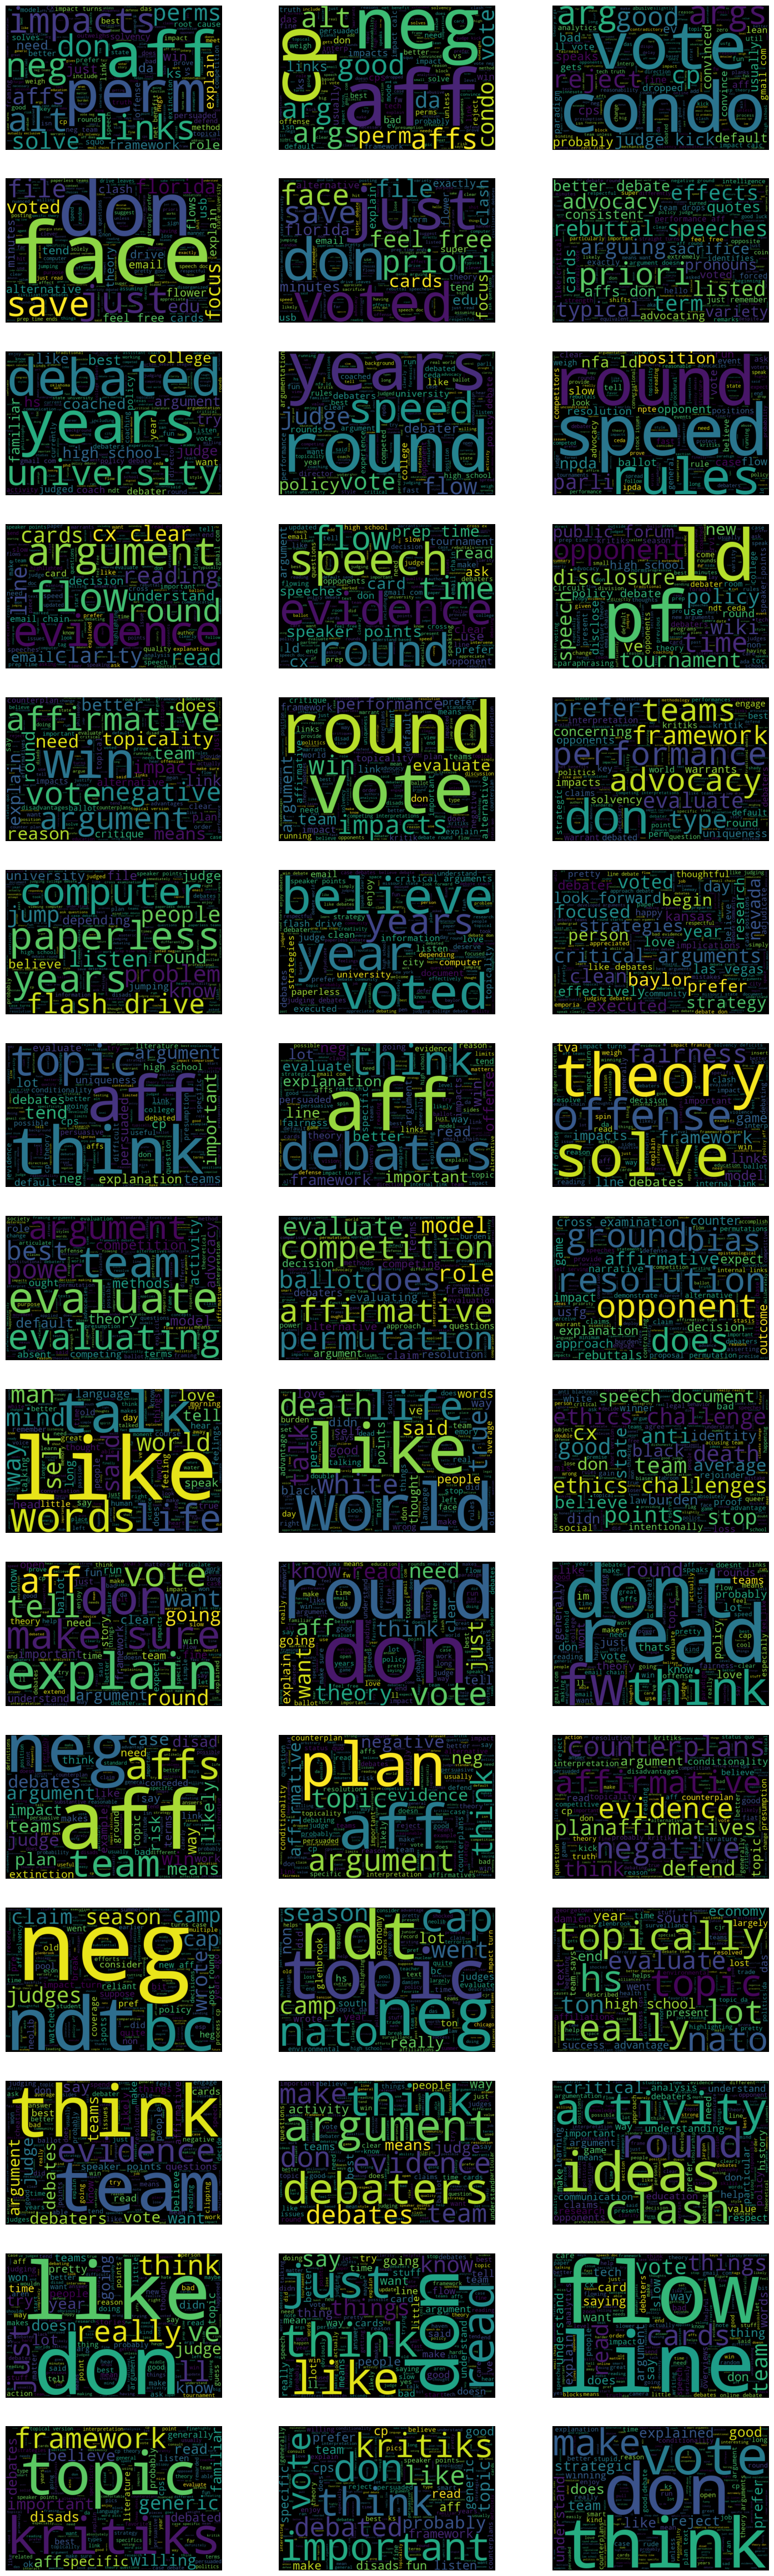

In [114]:
means_list = [negative_topic_mean, neutral_topic_mean, positive_topic_mean]
px = 1/plt.rcParams['figure.dpi']
fig, axes = plt.subplots(K,3, figsize=(600*3*px,K*400*px))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        word_freq = dict(zip(vocabulary, means_list[j][i,:]))
        wordcloud = WordCloud(width=600, height=400).generate_from_frequencies(word_freq)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        


In [48]:
authors_c.head()

ideal_point_0  ideal_point_1  ideal_point_2  ideal_point_3  \
Judge ID                                                               
23780         -0.116151       0.007651      -0.011368      -0.043465   
14370         -0.145082       0.001921       0.004035       0.096933   
14531         -0.100426       0.008859       0.013166      -0.018020   
37459          0.022522      -0.005200       0.030222       0.025980   
7933          -0.004503       0.013611      -0.014987      -0.027463   

          ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
Judge ID                                                               
23780         -0.985458      -0.001606       0.667010      -0.028922   
14370         -0.925864      -0.000179      -0.404481      -0.104735   
14531         -0.905907       0.054211       0.026825       0.008539   
37459         -0.860748      -0.034100      -0.304360       0.130019   
7933          -0.848896       0.000705      -0.213022      -0.027456   

          ideal_point_8  ideal_point_9  ...  ideal_point_21  ideal_point_22  \
Judge ID                                ...                                   
23780         -0.015065       0.168074  ...        0.035034       -0.002429   
14370         -0.020264       0.061315  ...        0.004731       -0.015926   
14531         -0.004760      -0.061835  ...       -0.009779       -0.003808   
37459         -0.027630       0.176267  ...       -0.001676       -0.005239   
7933           0.024020       0.283971  ...        0.027433        0.026750   

          ideal_point_23  ideal_point_24  ideal_point_25  ideal_point_26  \
Judge ID                                                                   
23780           1.868882       -0.058395       -0.436849        0.010565   
14370          -0.025946        0.029141       -0.012082       -0.005516   
14531          -0.093426        0.034075       -0.229691        0.042108   
37459           1.529982        0.033082        0.142701       -0.020060   
7933           -0.063795        0.015740        0.025700       -0.029375   

          ideal_point_27  ideal_point_28  ideal_point_29       Judge Name  
Judge ID                                                                   
23780           0.170675        0.040096       -0.012536  Vladimir Pavlov  
14370           0.028212       -0.026394       -0.020401        Ben Allen  
14531           0.030802       -0.042450       -0.007877   Carlos Astacio  
37459          -0.016573        0.173115       -0.032418   Isaiah Salgado  
7933            0.283197       -0.187952        0.030021    Zeke Mihelcic  

[5 rows x 31 columns]